In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [3]:
data = pd.read_excel(r"C:\Users\Ajith\Downloads\Product-Sales-Region.xlsx",sheet_name = "Sales")

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
0,2023-02-23,East,Laptop,14.0,163.60,Store B,Wholesale,0.00,Eva,2290.400,Online,FREESHIP,0.0,REG100000,Cust 6583,43.34,2023-02-23,2023-02-27,Eric
1,2024-12-19,South,Phone,1.0,544.01,Store A,Retail,0.00,Alice,544.010,Gift Card,SAVE10,0.0,REG100001,Cust 2144,5.30,2024-12-19,2024-12-28,Sophie
2,2023-05-10,North,Desk,14.0,346.18,Store B,Wholesale,0.10,Alice,4361.868,Online,WINTER15,0.0,REG100002,Cust 5998,20.46,2023-05-10,2023-05-19,Ryan
3,2025-02-26,Central,Chair,18.0,384.82,Store A,Wholesale,0.15,Frank,5887.746,Gift Card,FREESHIP,0.0,REG100003,Cust 7136,27.95,2025-02-26,2025-03-02,Cameron
4,2023-06-24,East,Desk,18.0,237.76,Store C,Retail,0.00,Carlos,4279.680,Online,SAVE10,0.0,REG100004,Cust 6506,5.73,2023-06-24,2023-06-27,Eric


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1500 non-null   datetime64[ns]
 1   Region         1500 non-null   object        
 2   Product        1500 non-null   object        
 3   Quantity       1500 non-null   float64       
 4   UnitPrice      1500 non-null   float64       
 5   StoreLocation  1500 non-null   object        
 6   CustomerType   1500 non-null   object        
 7   Discount       1500 non-null   float64       
 8   Salesperson    1500 non-null   object        
 9   TotalPrice     1500 non-null   float64       
 10  PaymentMethod  1501 non-null   object        
 11  Promotion      1132 non-null   object        
 12  Returned       1500 non-null   float64       
 13  OrderID        1500 non-null   object        
 14  CustomerName   1500 non-null   object        
 15  ShippingCost   1500 n

In [7]:
df['PaymentMethod'].value_counts(dropna=False)

PaymentMethod
Online          323
Cash            312
Credit Card     299
Debit Card      290
Gift Card       276
NaN               2
Null values       1
Name: count, dtype: int64

In [7]:
df[df['PaymentMethod'].isna()]

,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
1500,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1502,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [8]:
rows_to_drop = df[
    df['PaymentMethod'].isna() | 
    (df['PaymentMethod'].str.strip().str.lower() == 'null values')
]

In [9]:
rows_to_drop

,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
1500,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1501,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Null values,370,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1502,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [10]:
df = df.drop(rows_to_drop.index)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1500 non-null   datetime64[ns]
 1   Region         1500 non-null   object        
 2   Product        1500 non-null   object        
 3   Quantity       1500 non-null   float64       
 4   UnitPrice      1500 non-null   float64       
 5   StoreLocation  1500 non-null   object        
 6   CustomerType   1500 non-null   object        
 7   Discount       1500 non-null   float64       
 8   Salesperson    1500 non-null   object        
 9   TotalPrice     1500 non-null   float64       
 10  PaymentMethod  1500 non-null   object        
 11  Promotion      1130 non-null   object        
 12  Returned       1500 non-null   float64       
 13  OrderID        1500 non-null   object        
 14  CustomerName   1500 non-null   object        
 15  ShippingCost   1500 n

In [12]:
null_count = df['Promotion'].isna().sum()
total_rows = len(df)
null_percentage =round((null_count / total_rows) * 100,2)
print(null_percentage)

24.67


In [13]:
df["Promotion"].value_counts()

Promotion
FREESHIP    419
WINTER15    373
SAVE10      338
Name: count, dtype: int64

In [14]:
df['Promotion'] = df['Promotion'].fillna('FREESHIP')

In [15]:
df["Promotion"].value_counts()

Promotion
FREESHIP    789
WINTER15    373
SAVE10      338
Name: count, dtype: int64

In [16]:
df[['Date', 'OrderDate', 'DeliveryDate']].dtypes

Date            datetime64[ns]
OrderDate       datetime64[ns]
DeliveryDate    datetime64[ns]
dtype: object

In [17]:
invalid_date_records =(df['DeliveryDate'] < df['OrderDate']).sum()
print("invalid_date_records : ",invalid_date_records)

invalid_date_records :  0


In [18]:
df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalPrice']].describe()

,Quantity,UnitPrice,Discount,ShippingCost,TotalPrice
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.410667,298.826947,0.073133,27.507293,2919.994952
std,5.735732,169.100075,0.055979,13.093453,2522.789977
min,1.000000,5.520000,0.000000,5.010000,6.970000
25%,5.000000,151.020000,0.000000,16.700000,867.136250
50%,11.000000,294.740000,0.050000,27.100000,2174.724000
75%,15.000000,446.702500,0.100000,38.635000,4414.723500
max,20.000000,599.720000,0.150000,49.980000,11077.000000


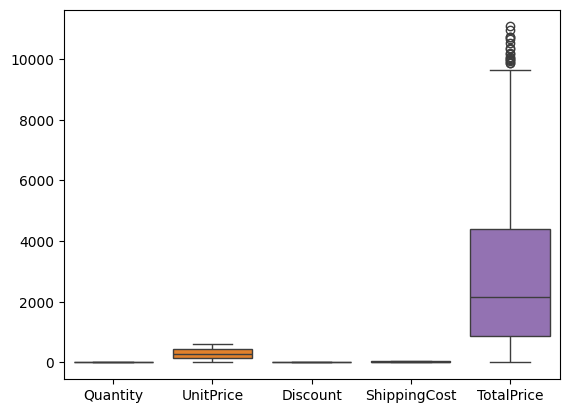

In [19]:
sns.boxplot(data=df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalPrice']])
plt.show()

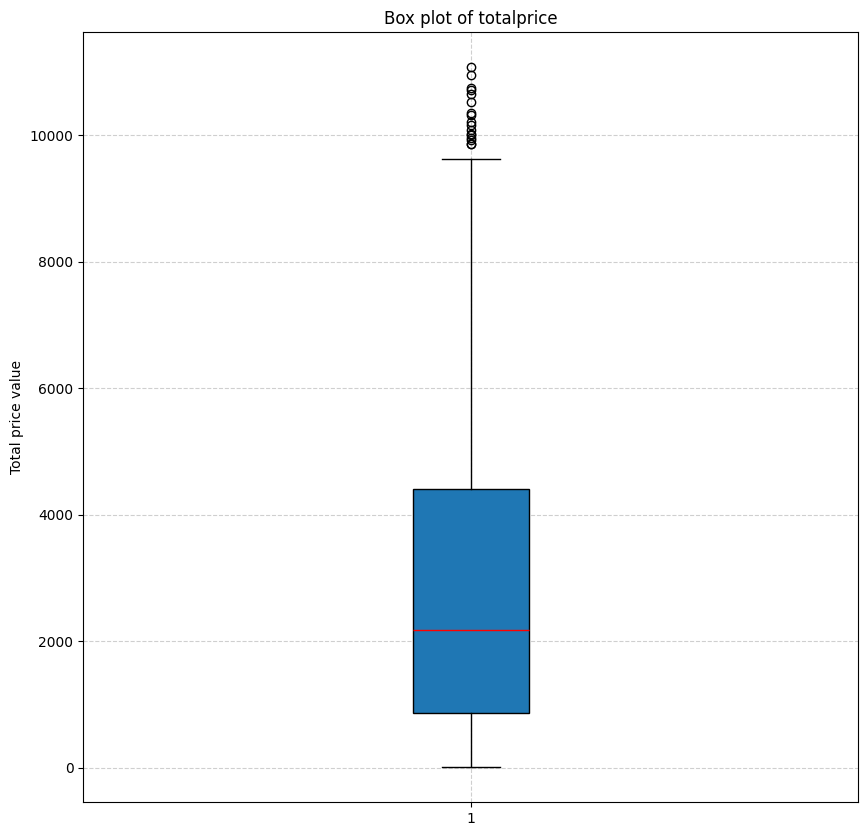

In [20]:
plt.figure(figsize=(10,10))
plt.boxplot(df["TotalPrice"].dropna(),vert = True, patch_artist= True,medianprops = {"color" :"red"})
plt.title("Box plot of totalprice")
plt.ylabel("Total price value")
plt.grid(True,linestyle = '--',alpha = 0.6)
plt.show()

In [21]:
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = round(Q3 - Q1,2)
print(IQR)

3547.59


In [22]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
# Outliers
outliers = df[(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]
outliers

Lower Bound: -4454.248750000001
Upper Bound: 9736.1085


,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
71,2023-02-11,Central,Tablet,20.0,548.01,Store A,Wholesale,0.10,Eva,9864.180,Credit Card,WINTER15,1.0,REG100071,Cust 4639,5.89,2023-02-11,2023-02-14,Cameron
87,2024-11-16,South,Tablet,20.0,548.34,Store B,Retail,0.10,Bob,9870.120,Gift Card,WINTER15,0.0,REG100087,Cust 9159,33.47,2024-11-16,2024-11-22,Sophie
229,2024-10-05,East,Tablet,20.0,576.30,Store D,Wholesale,0.05,Eva,10949.700,Credit Card,FREESHIP,0.0,REG100229,Cust 4627,25.22,2024-10-05,2024-10-09,Eric
336,2024-03-22,West,Laptop,19.0,590.00,Store D,Retail,0.05,Alice,10649.500,Online,FREESHIP,0.0,REG100336,Cust 1422,5.91,2024-03-22,2024-03-25,Wendy
351,2024-04-25,East,Monitor,19.0,526.23,Store B,Retail,0.00,Bob,9998.370,Credit Card,WINTER15,0.0,REG100351,Cust 3509,32.77,2024-04-25,2024-05-05,Eric
471,2023-01-16,West,Phone,20.0,553.85,Store A,Retail,0.00,Frank,11077.000,Cash,WINTER15,0.0,REG100471,Cust 6211,33.21,2023-01-16,2023-01-24,Wendy
486,2023-07-19,West,Monitor,20.0,526.55,Store A,Wholesale,0.00,Alice,10531.000,Debit Card,FREESHIP,1.0,REG100486,Cust 1210,25.64,2023-07-19,2023-07-26,Wendy
536,2024-09-22,East,Chair,18.0,575.10,Store D,Wholesale,0.00,Bob,10351.800,Online,FREESHIP,0.0,REG100536,Cust 9748,35.32,2024-09-22,2024-09-29,Eric
570,2025-03-28,North,Chair,18.0,553.23,Store D,Wholesale,0.00,Frank,9958.140,Cash,FREESHIP,0.0,REG100570,Cust 1375,31.76,2025-03-28,2025-04-01,Ryan
626,2024-07-10,South,Chair,20.0,504.22,Store D,Wholesale,0.00,Frank,10084.400,Online,WINTER15,0.0,REG100626,Cust 6107,14.61,2024-07-10,2024-07-19,Sophie


In [23]:
df_original = df.copy()

In [24]:
df['TotalPrice_Capped'] = df['TotalPrice'].clip(
    lower=lower_bound,
    upper=upper_bound
)

In [25]:
df[['TotalPrice', 'TotalPrice_Capped']].describe()

,TotalPrice,TotalPrice_Capped
count,1500.000000,1500.000000
mean,2919.994952,2913.362921
std,2522.789977,2503.686097
min,6.970000,6.970000
25%,867.136250,867.136250
50%,2174.724000,2174.724000
75%,4414.723500,4414.723500
max,11077.000000,9736.108500


<Axes: ylabel='TotalPrice'>

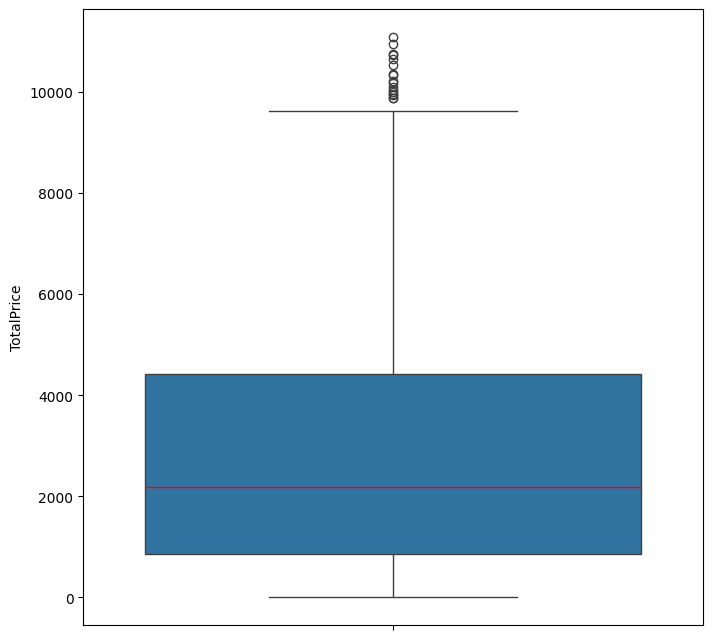

In [31]:
plt.figure(figsize =(8,8))
sns.boxplot(data = df["TotalPrice"] ,vert = True, patch_artist= True,medianprops = {"color" :"red"})

<Axes: ylabel='TotalPrice_Capped'>

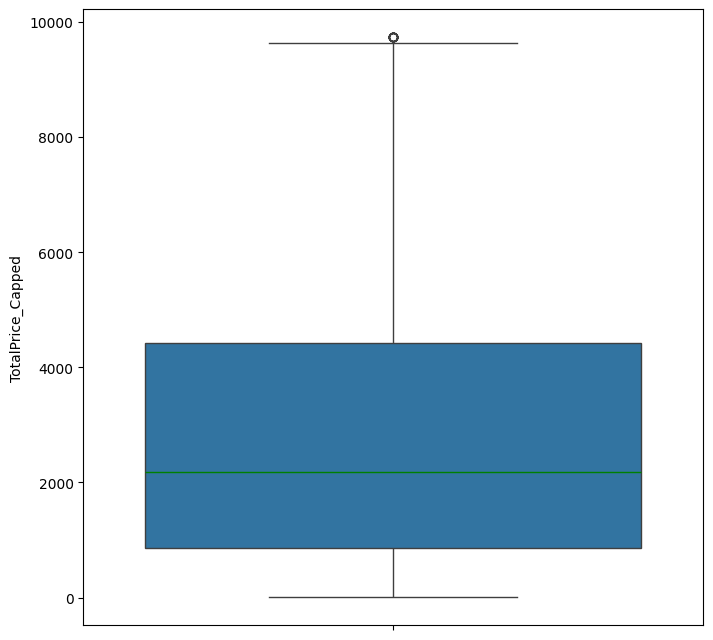

In [26]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df["TotalPrice_Capped"] , vert = True ,patch_artist = True , medianprops = {"color" : "green"})

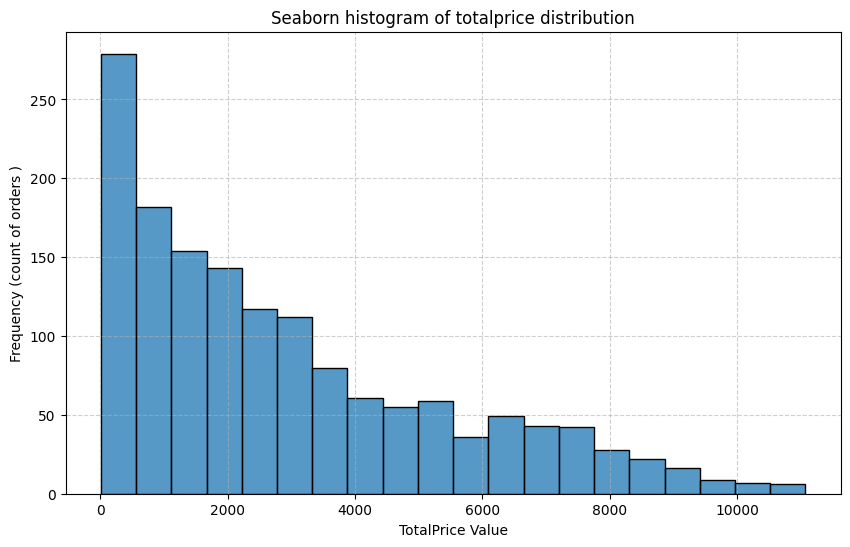

In [38]:
plt.figure(figsize =(10,6))
sns.histplot(data = df , x ='TotalPrice' ,bins = 20)
plt.title("Seaborn histogram of totalprice distribution")
plt.xlabel("TotalPrice Value")
plt.ylabel("Frequency (count of orders )")
plt.grid (True,linestyle = '--' ,alpha = 0.6)
plt.show()

In [27]:
print(df["TotalPrice_Capped"].max())

9736.1085


In [28]:
return_rate = df["Returned"].value_counts(normalize = True) * 100
print(return_rate)

Returned
0.0    75.2
1.0    24.8
Name: proportion, dtype: float64


In [43]:
non_returned_products = df[df['Returned'] == 0]
non_returned_products.shape

(1128, 20)

In [44]:
product_sales = non_returned_products.groupby("Product")["TotalPrice"].sum().sort_values(ascending = False).round(2)

In [31]:
returned_products = df[df['Returned'] == 1]
returned_products.shape

(372, 20)

In [32]:
print("product_sales Summary \n" ,product_sales)

product_sales Summary 
 Product
Printer    532599.11
Tablet     510835.14
Chair      471490.76
Laptop     471443.85
Monitor    460306.14
Desk       452516.69
Phone      370711.08
Name: TotalPrice, dtype: float64


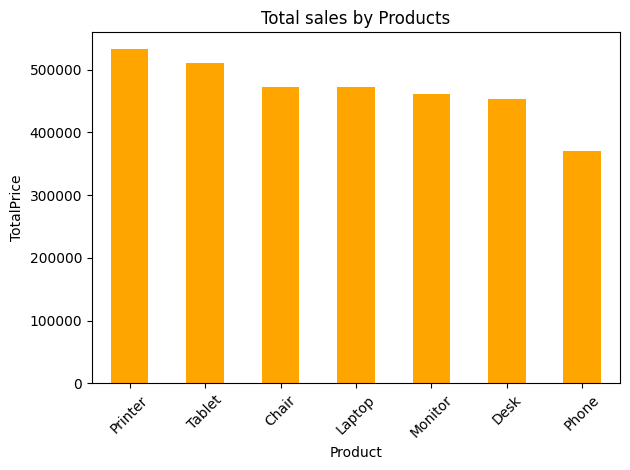

In [37]:
product_sales.plot(kind = "bar",color = "orange")
plt.title("Total sales by Products")
plt.xlabel("Product")
plt.ylabel("TotalPrice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df["Date"] = pd.to_datetime(df["Date"])

In [39]:
df["Date"]

0      2023-02-23
1      2024-12-19
2      2023-05-10
3      2025-02-26
4      2023-06-24
          ...    
1495   2025-02-17
1496   2024-01-11
1497   2024-07-27
1498   2024-12-03
1499   2025-05-09
Name: Date, Length: 1500, dtype: datetime64[ns]

In [40]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["TotalPrice"].sum().sort_values(ascending = False)
print(monthly_sales)

Date
2023-03    208548.6950
2025-03    183193.7690
2024-10    178167.1965
2024-01    174448.6735
2025-01    171098.0930
2024-04    165512.2635
2024-06    163370.0870
2023-08    159711.4975
2023-01    152811.7350
2025-05    152349.6110
2023-09    151612.0455
2023-04    149131.4485
2023-11    145156.3350
2024-12    143039.6205
2023-02    141357.3660
2024-03    140348.4895
2024-07    140155.7075
2023-07    139894.3400
2025-02    138184.6330
2024-11    138174.2850
2025-06    136666.5515
2024-02    135515.8145
2023-06    134225.0305
2024-05    132792.5330
2024-09    130502.6035
2024-08    129927.5060
2025-04    128675.0145
2023-12    119709.9015
2023-05    117265.8815
2023-10     78445.7005
Freq: M, Name: TotalPrice, dtype: float64


In [45]:
#Top selling Product
product_sales = non_returned_products.groupby("Product")["TotalPrice"].sum().sort_values(ascending = False)
print(product_sales)

Product
Printer    532599.1095
Tablet     510835.1350
Chair      471490.7610
Laptop     471443.8545
Monitor    460306.1360
Desk       452516.6895
Phone      370711.0790
Name: TotalPrice, dtype: float64


In [46]:
#Top selling Regions
region_sales = non_returned_products.groupby('Region')['TotalPrice'].sum().sort_values(ascending = False)
print(region_sales)

Region
North      736811.4195
East       683125.2280
Central    654013.9330
South      603811.7990
West       592140.3850
Name: TotalPrice, dtype: float64


In [90]:
#Customer type pattern (which type buys more)
customer_pattern = non_returned_products.groupby('CustomerType')["TotalPrice"].sum().sort_values(ascending = False)
print(customer_pattern)

CustomerType
Retail       1.641110e+06
Wholesale    1.628793e+06
Name: TotalPrice, dtype: float64


In [47]:
#payment method preference
payment_method = df["PaymentMethod"].value_counts()
print(payment_method)

PaymentMethod
Online         323
Cash           312
Credit Card    299
Debit Card     290
Gift Card      276
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1456b82d1d0>,
 [Text(-0.16752547694627457, 1.0871684389154808, 'Online'),
  Text(-1.0957469842595156, 0.09663615517070778, 'Cash'),
  Text(-0.40707769787853165, -1.0219039817369904, 'Credit Card'),
  Text(0.8296768476623331, -0.722243953559387, 'Debit Card'),
  Text(0.9811509371784728, 0.4973357401934882, 'Gift Card')],
 [Text(-0.09137753287978612, 0.5930009666811713, '21.5%'),
  Text(-0.5976801732324629, 0.05271063009311333, '20.8%'),
  Text(-0.22204238066101725, -0.5574021718565402, '19.9%'),
  Text(0.452551007815818, -0.3939512473960292, '19.3%'),
  Text(0.5351732384609851, 0.27127404010553896, '18.4%')])

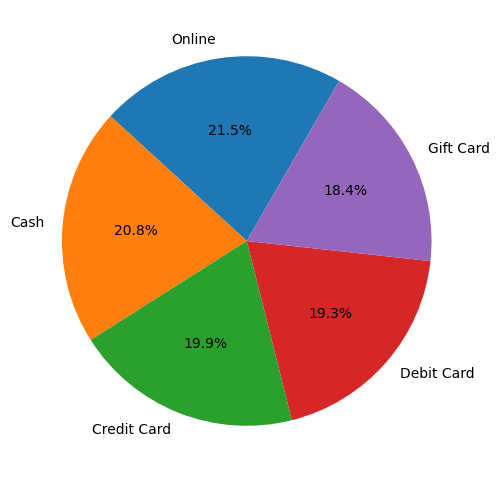

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(
    payment_method,
    labels=payment_method.index,
    autopct='%1.1f%%',
        startangle=60
)

In [50]:
#store location pattern
store_sales = non_returned_products.groupby("StoreLocation")["TotalPrice"].sum().sort_values(ascending = False)
print(store_sales)

StoreLocation
Store D    913084.0795
Store A    810205.5850
Store C    810083.7910
Store B    736529.3090
Name: TotalPrice, dtype: float64


In [51]:
#Salesperson performace
sales_person = non_returned_products.groupby("Salesperson")["TotalPrice"].sum().sort_values(ascending = False)
print(sales_person)

Salesperson
Bob       606773.9835
Alice     591860.9475
Frank     555391.8790
Eva       531819.4495
Carlos    496695.5805
Diana     487360.9245
Name: TotalPrice, dtype: float64


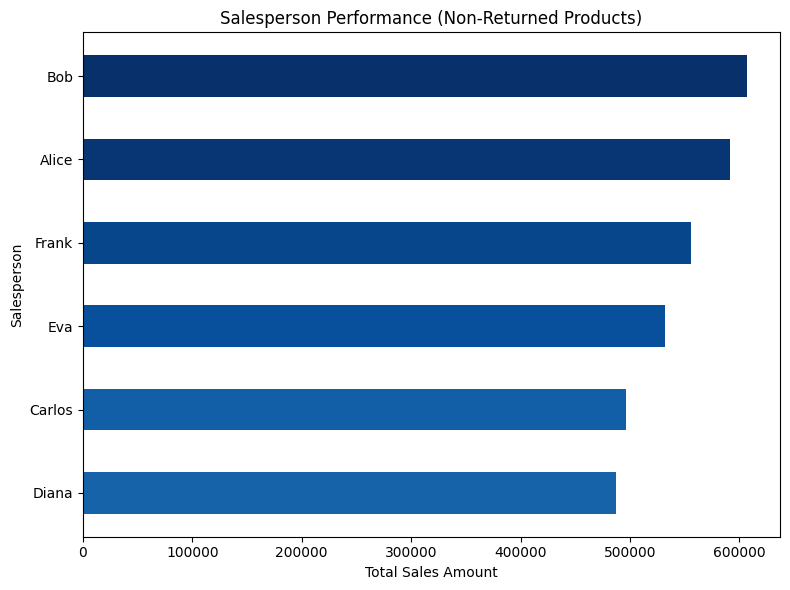

In [52]:
plt.figure(figsize=(8, 6))
plt.barh(
    sales_person.index,
    sales_person.values,
    height = 0.5,
    color=plt.cm.Blues(
        sales_person.values / sales_person.values.max()
    )
)
plt.xlabel("Total Sales Amount")
plt.ylabel("Salesperson")
plt.title("Salesperson Performance (Non-Returned Products)")
plt.gca().invert_yaxis()  # Highest performer on top
plt.tight_layout()
plt.show()

In [53]:
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

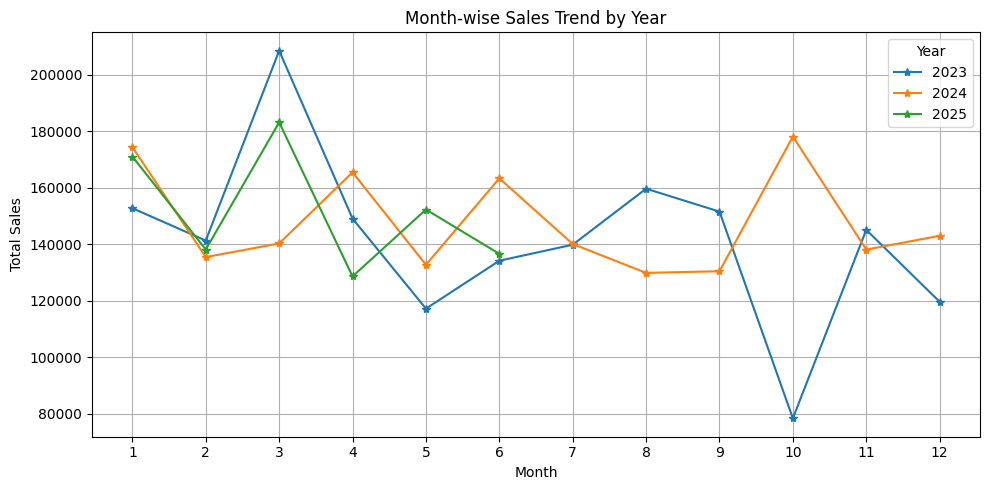

In [66]:
year_month_sales = (
    df.groupby(['Year', 'Month'])['TotalPrice']
    .sum()
    .reset_index()
)
plt.figure(figsize=(10, 5))

for year in year_month_sales['Year'].unique():
    data = year_month_sales[year_month_sales['Year'] == year]
    plt.plot(data['Month'], data['TotalPrice'], marker='*', label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Sales Trend by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [73]:
#profitability Analysis
df["Profit"] = df["TotalPrice"] - (df["Quantity"] * df["UnitPrice"])
df["Profit"][10]

np.float64(-1177.4025000000001)

In [57]:
#Repeat customer pattern
repeat_customers= non_returned_products["CustomerName"].value_counts().head(10)
print(repeat_customers)

CustomerName
Cust 8150    3
Cust 9697    2
Cust 6506    2
Cust 4002    2
Cust 1656    2
Cust 6895    2
Cust 7367    2
Cust 3001    2
Cust 2546    2
Cust 9506    2
Name: count, dtype: int64


In [70]:
# Step 1: Ask for customer name or ID
customer = input("Enter Customer Name or ID: ")

# Step 2: Filter data
filtered_data = non_returned_products[
    non_returned_products["CustomerName"] == customer
]
# Step 3: Run remaining code automatically
if filtered_data.empty:
    print("No records found for this customer.")
else:
    # Total purchase amount
    total_purchase = filtered_data["TotalPrice"].sum()
    print("Total Purchase Amount:", total_purchase)
    # Number of orders
    order_count = filtered_data.shape[0]
    print("Number of Orders:", order_count)
    # Average order value
    avg_order = filtered_data["TotalPrice"].mean()
    print(f"Average Order Value: {avg_order:.2f}")
    # Top purchased product
    top_product = filtered_data["Product"].value_counts().head(1)
    print("\nTop Purchased Product:")
    print(top_product)
    # Preferred payment method
    payment_pref = filtered_data["PaymentMethod"].value_counts().head(1)
    print("\nPreferred Payment Method:")
    print(payment_pref)
    # Average discount
    avg_discount = filtered_data["Discount"].mean()
    print(f"\nAverage Discount: {avg_discount:.4f}")
    #Loyalty score
    loyalty_score = (order_count * avg_order)/(1+ avg_discount)
    print(f"Loyalty-Score : {loyalty_score:.2f}")
filtered_data

Enter Customer Name or ID:  Cust 8150


Total Purchase Amount: 5485.418
Number of Orders: 3
Average Order Value: 1828.47

Top Purchased Product:
Product
Printer    2
Name: count, dtype: int64

Preferred Payment Method:
PaymentMethod
Online    2
Name: count, dtype: int64

Average Discount: 0.0667
Loyalty-Scorev : 5142.58


,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager,TotalPrice_Capped
901,2023-08-01,North,Printer,8.0,141.28,Store D,Wholesale,0.05,Frank,1073.728,Online,FREESHIP,0.0,REG100901,Cust 8150,28.69,2023-08-01,2023-08-10,Ryan,1073.728
1101,2023-01-29,North,Printer,10.0,140.50,Store B,Retail,0.15,Carlos,1194.250,Online,FREESHIP,0.0,REG101101,Cust 8150,43.81,2023-01-29,2023-02-05,Ryan,1194.250
1471,2023-06-30,South,Monitor,6.0,536.24,Store D,Retail,0.00,Diana,3217.440,Cash,WINTER15,0.0,REG101471,Cust 8150,35.32,2023-06-30,2023-07-02,Sophie,3217.440
